<a href="https://colab.research.google.com/github/iamsoumya421/Soumyojit-Saha/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mounting of the drive**

In [1]:
!pip install google

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Importing Libaries**

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals import joblib
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import math

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


#**Data Pre-processing**

In [5]:
car_data = pd.read_csv("/content/drive/MyDrive/car_price_prediction_model/Data/CarPrice.csv")

In [6]:
car_data.head(9)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,NaN,1061.0,57.50,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,170Nm@ 1800-2400rpm,5.0


In [7]:
car_data.shape

(8128, 13)

In [8]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7905 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 825.6+ KB


In [9]:
car_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          223
engine           221
max_power        216
torque           222
seats            221
dtype: int64

In [10]:
car_data = car_data.drop(['name', 'torque', 'seller_type'],axis = 1)

In [11]:
print(car_data.fuel.value_counts())
print(car_data.transmission.value_counts())
print(car_data.owner.value_counts())

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64
Manual       7078
Automatic    1050
Name: transmission, dtype: int64
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64


In [12]:
car_data.replace({'fuel':{'Diesel':0, 'Petrol':1, 'CNG':2, 'LPG':3}}, inplace= True)
car_data.replace({'transmission':{'Manual':0, 'Automatic':1}}, inplace= True)
car_data.replace({'owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4}}, inplace= True)

In [13]:
car_data.head()

,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,0,0,0,23.40,1248.0,74.00,5.0
1,2014,370000,120000,0,0,1,21.14,1498.0,103.52,5.0
2,2006,158000,140000,1,0,2,17.70,1497.0,78.00,5.0
3,2010,225000,127000,0,0,0,23.00,1396.0,90.00,5.0
4,2007,130000,120000,1,0,0,16.10,1298.0,88.20,5.0


In [14]:
median_mileage = int(math.floor(car_data.mileage.median()))
car_data.mileage = car_data.mileage.fillna(median_mileage)
median_max_power = int(math.floor(car_data.max_power.median()))
car_data.max_power = car_data.max_power.fillna(median_max_power)
median_engine = int(math.floor(car_data.engine.median()))
car_data.engine = car_data.engine.fillna(median_engine)
median_seats = int(math.floor(car_data.seats.median()))
car_data.seats = car_data.seats.fillna(median_seats)

In [15]:
car_data.head()

,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,0,0,0,23.40,1248.0,74.00,5.0
1,2014,370000,120000,0,0,1,21.14,1498.0,103.52,5.0
2,2006,158000,140000,1,0,2,17.70,1497.0,78.00,5.0
3,2010,225000,127000,0,0,0,23.00,1396.0,90.00,5.0
4,2007,130000,120000,1,0,0,16.10,1298.0,88.20,5.0


#**Data Visualization**

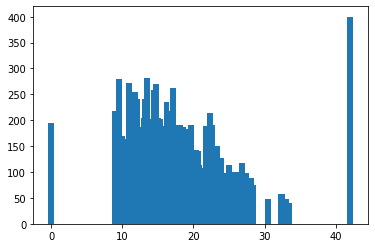

In [16]:
plt.bar(car_data.mileage,car_data.max_power)
plt.show()

#**Splitting the data in training and test set**

In [17]:
X = np.asanyarray(car_data[['km_driven','fuel','mileage','engine','seats']])

In [18]:
Y = np.asanyarray(car_data['selling_price'])

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split( X, Y, test_size = 0.05, random_state=100)

In [20]:
X_train.shape

(7721, 5)

In [21]:
X_test.shape

(407, 5)

In [22]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

#**Model Making**

**Model_0**

In [ ]:
model_0 = LinearRegression()
model_0.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred_train_x_lr = model_0.predict(X_train)

In [ ]:
metrics.r2_score(Y_train, pred_train_x_lr)

0.6684432124490698

In [ ]:
pred_test_x_lr = model_0.predict(X_test)

In [ ]:
metrics.r2_score(Y_test, pred_test_x_lr)

0.6620964036941224

In [ ]:
#Saving the model

joblib.dump(model_0, "/content/drive/MyDrive/car_price_prediction_model/Models/lr_model.sav")

['/content/drive/MyDrive/car_price_prediction_model/Models/lr_model.sav']

**Model_1**

In [ ]:
model_1 = Lasso()
model_1.fit(X_train, Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
pred_train_x_lasso = model_1.predict(X_train)

In [ ]:
metrics.r2_score(Y_train, pred_train_x_lasso)

0.6684432124173589

In [ ]:
pred_test_x_lasso = model_1.predict(X_test)

In [ ]:
metrics.r2_score(Y_test, pred_test_x_lasso)

0.6620965990793645

In [ ]:
#Saving the model

joblib.dump(model_1, "/content/drive/MyDrive/car_price_prediction_model/Models/lasso_model.sav")

['/content/drive/MyDrive/car_price_prediction_model/Models/lasso_model.sav']

**Model_2** *italicized text*

In [23]:
model_2=RandomForestRegressor(n_estimators=10, random_state=5)
model_2.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=5, verbose=0, warm_start=False)

In [24]:
pred_train_X_ranfor = model_2.predict(X_train)

In [25]:
metrics.r2_score(Y_train, pred_train_X_ranfor)

0.9801031707395228

In [26]:
pred_test_x_ranfor=model_2.predict(X_test)

In [27]:
metrics.r2_score(Y_test, pred_test_x_ranfor) 

0.8553354270937962

In [28]:
#Saving the model

joblib.dump(model_2, "/content/drive/MyDrive/car_price_prediction_model/Models/ranfor_model.sav")

['/content/drive/MyDrive/car_price_prediction_model/Models/ranfor_model.sav']

#**Loading Model**

In [ ]:
lr_model_load = joblib.load("lr_model")

FileNotFoundError: ignored

TypeError: ignored